In [1]:
# Weeks 5 & 6 Exercises

In [2]:
# 1. The Data Wrangling Workshop: Activity 5.01, page 281
# Reading tabular data from a web page and creating dataframes
# from https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)

In [3]:
#Read the page using bs4

In [4]:
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
# Open the wikipedia file
fd = open("datasets/List of countries by GDP (nominal) - Wikipedia.htm", "r", encoding = "utf-8")
soup = BeautifulSoup(fd)
fd.close()

In [6]:
# Calculate the tables by using the command
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 9 


In [7]:
# Find the right table using the class attribute by using the follwing command
data_table = soup.find("table", {"class": '"wikitable"|}'})
print(type(data_table))

<class 'bs4.element.Tag'>


In [8]:
# Seperate the source and the actual data by using the following command
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))

3


In [9]:
# Use the findAll function to find the data from the body tag of data_table
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [10]:
# Use the finaAll function to find the data from the data_table td tag by using the command
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

In [11]:
# Find the length of data_tables by using the follwing command
len(data_tables)

3

In [12]:
# Check how to get the source names by using the follwing command
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [13]:
# Seperate the header and data for the first source
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [14]:
#  Find the rows from data_tables using findAll
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')

In [15]:
# Find the data from rows1 using the strip function for each td tag
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

In [16]:
# Find the DataFrame
df1 = pd.DataFrame(data_rows1, columns=header1)
df1.head()

,Rank,Country,GDP(US$MM)
0,,World[19],"79,865,481"
1,1,United States,"19,390,600"
2,2,China[n 1],"12,014,610"
3,3,Japan,"4,872,135"
4,4,Germany,"3,684,816"


In [17]:
# Do the same for the other two sources
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [18]:
# Find the rows from data_tables using findAll
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')


In [19]:
# Define find_right_text using strip function
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [20]:
# Find the rows from data_rows using find_right_text
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]


In [21]:
# Calculate the df2 DataFrame
df2 = pd.DataFrame(data_rows2, columns=header2)
df2.head()

,Rank,Country,GDP(US$MM)
0,,World,"80,683,787"
1,1,United States,"19,390,604"
2,,European Union[23],"17,277,698"
3,2,China[n 4],"12,237,700"
4,3,Japan,"4,872,137"


In [22]:
# Perform the same operations for the third dataframe 
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [23]:
# Find the rows from data_tables using findAll
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')


In [24]:
# Find the rows from data_rows3 by using find_right_text
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]


In [25]:
# Calculate the df3 DataFrame 
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country,GDP(US$MM)
0,,World,"80,683,787"
1,1,United States,"19,390,604"
2,,European Union[23],"17,277,698"
3,2,China[n 4],"12,237,700"
4,3,Japan,"4,872,137"


In [26]:
# The Data Wrangling Workshop: Activity 6.01, page 309
# Handling outliers and missing data

In [27]:
# Load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# Read the csv file
df = pd.read_csv("datasets/visit_data.csv")

In [29]:
# Print the data from the dataframe
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [30]:
# Check for duplicates
print("First name is duplicated - {}".format(any(df.first_name.duplicated())))
print("Last name is duplicated - {}".format(any(df.last_name.duplicated())))
print("Email is duplicated - {}".format(any(df.email.duplicated())))

First name is duplicated - True
Last name is duplicated - True
Email is duplicated - False


In [31]:
# Notice that we have different ways to format boolean values for the % op-erator
# Check if there are any NaN values
print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())

The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 


In [32]:
# There are various ways to do this. This is just one way. We encourage you to explore other ways.
# But before that we need to store the previous size of the data set and we will compare it with the new size
size_prev = df.shape
df = df[np.isfinite(df['visit'])] #This is an inplace operation. After this operation the original DataFrame is lost.
size_after = df.shape

In [33]:
# Notice how parameterized format is used and then the indexing is working inside the quote marks
# Report the size difference
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
format(prev=size_prev, after=size_after))

The size of previous data was - 1000 rows and the size of the new one is - 974 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x1e0bb03d1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0bb03d790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0bb03c7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0bb03ddc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e0bb03e090>],
 'means': []}

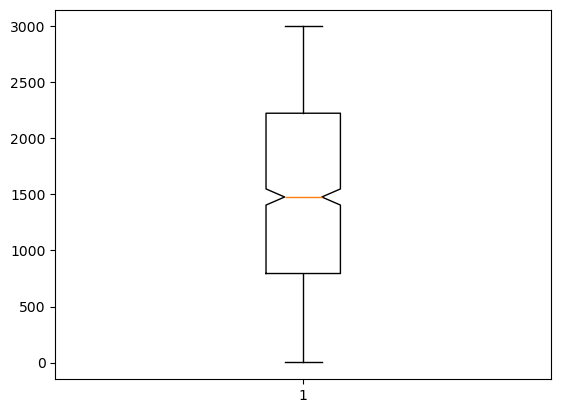

In [34]:
# Plot a box to find whether the data has outliers
plt.boxplot(df.visit, notch=True)

In [35]:
# Get rid of values beyond 2900 and below 100 - these are outliers for us. We need to get rid of them
df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]  # Notice the power-ful & operator
# Here we abuse the fact the number of variable can be greater than the num-ber of replacement targets
print("After getting rid of outliers the new size of the data is - {}".format(*df1.shape))

After getting rid of outliers the new size of the data is - 923


In [36]:
#3. Insert data into a SQL Lite database – create a table with the following data below that you will create yourself
# (Hint on how to create the SQL: Python for Data Analysis 2nd edition page 191, Python for Data Analysis 3rd Edition: Page 199):
#a. Name, Address, City, State, Zip, Phone Number
#b. Add at least 10 rows of data and submit your code with a query generating your results.

In [37]:
import sqlite3

In [38]:
# Create a table user_info, if already present then drop and create
query = "DROP table user_info"
# Create a connection object to sqllite
con = sqlite3.connect("mydata.sqlite")
con.execute(query)
con.commit()
# Prepare a query
query = """CREATE TABLE user_info(Name VARCHAR(50), Address VARCHAR(100), City VARCHAR(30), State VARCHAR(30), Zip INTEGER, Phone INTEGER);"""

In [39]:
# Create a connection object to sqllite
con = sqlite3.connect("mydata.sqlite")

In [40]:
con.execute(query)

In [41]:
# Prepare data

In [42]:
data = [("John", "Test address1", "Atlanta", "Georgia", 23560, 111222333),
        ("Adam", "Test address2", "Dallas", "Texas", 75020, 111222300),
        ("Daniel", "Test address3", "Austin", "Texas", 65790, 111222500),
        ("Woody", "Test address4", "Houston" ,"Texas", 55600, 111222400),
        ("Armando", "Test address5", "Plano", "Texas", 75034, 111222320),
        ("Ashish", "Test address6", "McKinney", "Texas", 75070, 111222600),
        ("Dave", "Test address7", "Waco", "Texas", 75032, 111222700),
        ("Santiago", "Test address8", "Arlington", "Texas", 75037, 111222800),
        ("Ram", "Test address9", "Louisville", "Texas", 75010, 111222900),
        ("Joe", "Test address10", "Prosper", "Texas", 75023, 111222100)
       ]

In [43]:
# Insert data into table
stmt = "INSERT INTO user_info VALUES(?,?,?,?,?,?)"

In [44]:
con.executemany(stmt, data)

In [45]:
# Commit data
con.commit()

In [46]:
# select * from the table user_info
cursor = con.execute("SELECT * FROM user_info")

In [47]:
# collect all the data
rows = cursor.fetchall()

In [48]:
# print rows
rows

[('John', 'Test address1', 'Atlanta', 'Georgia', 23560, 111222333),
 ('Adam', 'Test address2', 'Dallas', 'Texas', 75020, 111222300),
 ('Daniel', 'Test address3', 'Austin', 'Texas', 65790, 111222500),
 ('Woody', 'Test address4', 'Houston', 'Texas', 55600, 111222400),
 ('Armando', 'Test address5', 'Plano', 'Texas', 75034, 111222320),
 ('Ashish', 'Test address6', 'McKinney', 'Texas', 75070, 111222600),
 ('Dave', 'Test address7', 'Waco', 'Texas', 75032, 111222700),
 ('Santiago', 'Test address8', 'Arlington', 'Texas', 75037, 111222800),
 ('Ram', 'Test address9', 'Louisville', 'Texas', 75010, 111222900),
 ('Joe', 'Test address10', 'Prosper', 'Texas', 75023, 111222100)]